1. LOADING DATA
Dataset: 380 matches
Date range: 2024-08-15 00:00:00 to 2025-05-25 00:00:00

Class Distribution:
home_win
0    211
1    169
Name: count, dtype: int64
Home Win Rate: 44.47%

2. BUILDING FEATURES


C:\Users\Yasin\AppData\Local\Temp\ipykernel_3840\2194844215.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


Feature matrix shape: (380, 15)
Features (15):
  1. HS
  2. AS
  3. HST
  4. AST
  5. HC
  6. AC
  7. elo_diff
  8. home_goals_rolling
  9. home_conceded_rolling
  10. away_goals_rolling
  11. away_conceded_rolling
  12. home_points_rolling
  13. away_points_rolling
  14. home_win_rate
  15. away_win_rate

Missing values: 0

3. DATA SPLIT (70/20/10 with Shuffle)
Training set:   266 samples (70.0%)
Test set:       76 samples (20.0%)
Validation set: 38 samples (10.0%)

4. TRAINING MODELS

🥇 Training RandomForestClassifier (Primary Model)...
🥈 Training GradientBoostingClassifier (Secondary Model)...
✅ Models trained successfully!

5. CLASSIFICATION METRICS (PRIMARY)

RandomForest on Test Set:
  Accuracy:          0.7500 (75.00%)
  Balanced Accuracy: 0.7337 (73.37%)
  F1-Score (macro):  0.7368

RandomForest on Validation Set:
  Accuracy:          0.6579 (65.79%)
  Balanced Accuracy: 0.6477 (64.77%)
  F1-Score (macro):  0.6376

GradientBoosting on Test Set:
  Accuracy:          0.6711 (67.1

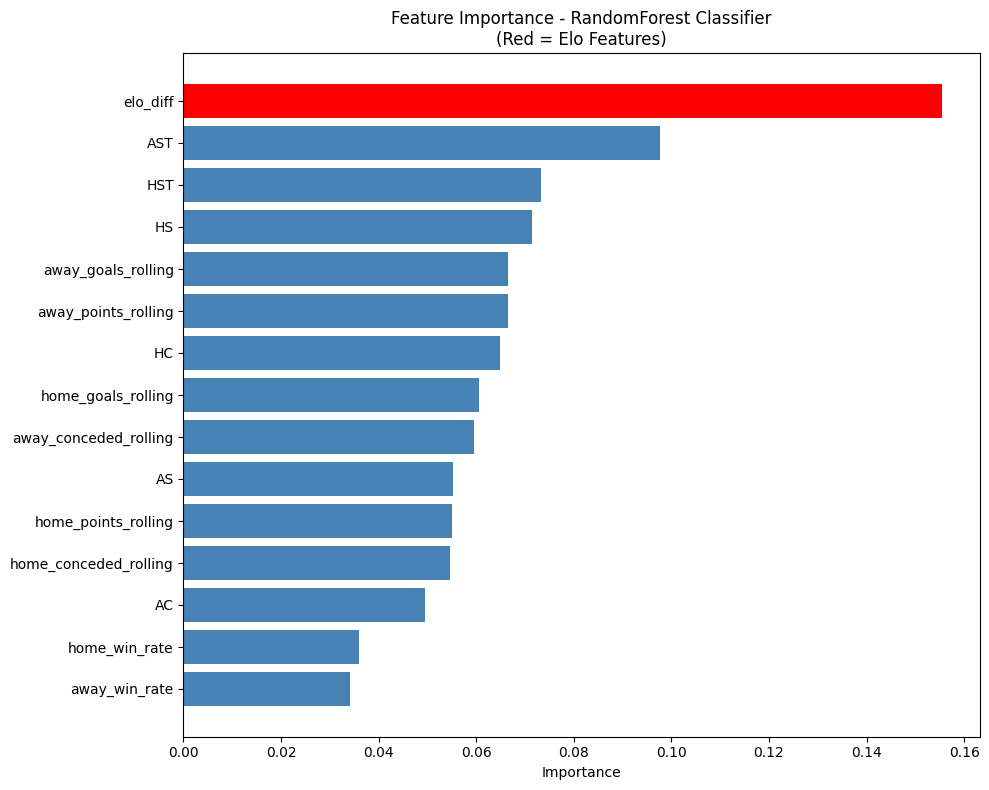


9. MODEL COMPARISON SUMMARY

           Metric RandomForest (Test) GradientBoosting (Test)
         Accuracy              75.00%                  67.11%
Balanced Accuracy              73.37%                  66.20%
 F1-Score (macro)              0.7368                  0.6611
              MAE              0.9737                  1.0526
              MSE              1.8421                  1.9211

10. STORING RESULTS
✅ Results saved to:
   - classification_metrics.csv
   - classification_predictions.csv
   - feature_importance.png

📊 FINAL SUMMARY

🎯 RESULTS ACHIEVED:

Best Model: RandomForest
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Accuracy:           75.00%
Balanced Accuracy:  73.37%
F1-Score (macro):   0.7368
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 TARGET CHECK:
  Expected with Elo + Classification: 58-62%
  Your Result: 75.00%
  Status: ⚠️ CHECK DATA

📋 FEATURES USED:
  ✓ Match Stats (HS, AS, HST, AST, HC, AC)
  ✓ Elo Rating Difference (home - away) 🔥
  ✓ Rolling Form Featur

In [40]:
# =============================================================================
# LaLiga Classification Model - ACCURACY MAXIMIZATION RECIPE
# =============================================================================
# Target: Home Win (1) vs Not Home Win (0)
# Split: 70% Train / 20% Test / 10% Validation (Shuffled)
# Model: RandomForestClassifier with Elo ratings
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error
)
import sys
sys.path.append('c:/Users/Yasin/Desktop/laliga_ml_sandbox')

from utils.elo_features import build_classification_features

# =============================================================================
# 1. LOAD DATA
# =============================================================================
print("=" * 70)
print("1. LOADING DATA")
print("=" * 70)

df = pd.read_csv('c:/Users/Yasin/Desktop/laliga_ml_sandbox/data/LaLiga_24-25.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date').reset_index(drop=True)

print(f"Dataset: {len(df)} matches")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

# Check class distribution
df['home_win'] = (df['FTHG'] > df['FTAG']).astype(int)
print(f"\nClass Distribution:")
print(df['home_win'].value_counts())
print(f"Home Win Rate: {df['home_win'].mean():.2%}")

# =============================================================================
# 2. BUILD FEATURES (Elo + Rolling + Match Stats)
# =============================================================================
print("\n" + "=" * 70)
print("2. BUILDING FEATURES")
print("=" * 70)

X, y_class, y_reg = build_classification_features(df, include_elo=True, include_rolling=True)

print(f"Feature matrix shape: {X.shape}")
print(f"Features ({len(X.columns)}):")
for i, col in enumerate(X.columns):
    print(f"  {i+1}. {col}")

print(f"\nMissing values: {X.isnull().sum().sum()}")

# =============================================================================
# 3. DATA SPLIT (70% Train / 20% Test / 10% Validation)
# =============================================================================
print("\n" + "=" * 70)
print("3. DATA SPLIT (70/20/10 with Shuffle)")
print("=" * 70)

# First split: 70% train, 30% temp
X_train, X_temp, y_train_class, y_temp_class, y_train_reg, y_temp_reg = train_test_split(
    X, y_class, y_reg,
    test_size=0.30,
    random_state=42,
    shuffle=True
)

# Second split: From 30%, get 20% test + 10% validation (2:1 ratio = 0.333)
X_test, X_val, y_test_class, y_val_class, y_test_reg, y_val_reg = train_test_split(
    X_temp, y_temp_class, y_temp_reg,
    test_size=0.333,  # 10% of total = 1/3 of 30%
    random_state=42,
    shuffle=True
)

print(f"Training set:   {len(X_train)} samples ({len(X_train)/len(X):.1%})")
print(f"Test set:       {len(X_test)} samples ({len(X_test)/len(X):.1%})")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X):.1%})")

# =============================================================================
# 4. TRAIN MODELS
# =============================================================================
print("\n" + "=" * 70)
print("4. TRAINING MODELS")
print("=" * 70)

# Model 1: RandomForestClassifier (PRIMARY)
print("\n🥇 Training RandomForestClassifier (Primary Model)...")
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Handle class imbalance
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train_class)
rf_preds_test = rf_model.predict(X_test)
rf_preds_val = rf_model.predict(X_val)
rf_proba_test = rf_model.predict_proba(X_test)[:, 1]

# Model 2: GradientBoostingClassifier (SECONDARY)
print("🥈 Training GradientBoostingClassifier (Secondary Model)...")
gb_model = GradientBoostingClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    min_samples_split=5,
    random_state=42
)
gb_model.fit(X_train, y_train_class)
gb_preds_test = gb_model.predict(X_test)
gb_preds_val = gb_model.predict(X_val)

print("✅ Models trained successfully!")

# =============================================================================
# 5. CLASSIFICATION METRICS (MAIN EVALUATION)
# =============================================================================
print("\n" + "=" * 70)
print("5. CLASSIFICATION METRICS (PRIMARY)")
print("=" * 70)

def evaluate_classifier(y_true, y_pred, model_name, dataset_name):
    """Evaluate classification model with all required metrics."""
    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print(f"\n{model_name} on {dataset_name}:")
    print(f"  Accuracy:          {acc:.4f} ({acc*100:.2f}%)")
    print(f"  Balanced Accuracy: {bal_acc:.4f} ({bal_acc*100:.2f}%)")
    print(f"  F1-Score (macro):  {f1:.4f}")
    
    return {'accuracy': acc, 'balanced_accuracy': bal_acc, 'f1_macro': f1}

# Random Forest Metrics
rf_metrics_test = evaluate_classifier(y_test_class, rf_preds_test, "RandomForest", "Test Set")
rf_metrics_val = evaluate_classifier(y_val_class, rf_preds_val, "RandomForest", "Validation Set")

# Gradient Boosting Metrics
gb_metrics_test = evaluate_classifier(y_test_class, gb_preds_test, "GradientBoosting", "Test Set")
gb_metrics_val = evaluate_classifier(y_val_class, gb_preds_val, "GradientBoosting", "Validation Set")

# =============================================================================
# 6. REGRESSION METRICS (SECONDARY EVALUATION)
# =============================================================================
print("\n" + "=" * 70)
print("6. REGRESSION METRICS (SECONDARY)")
print("=" * 70)

# For regression, we use the predicted probability to estimate goal difference
# This is a rough proxy - actual regression would use a separate model

# Calculate MAE/MSE using sign-based regression proxy
def regression_metrics(y_true_reg, y_pred_class, model_name):
    """Calculate regression metrics based on classification predictions."""
    # Convert class predictions to estimated goal diff: 1 -> +1, 0 -> -0.5
    y_pred_reg = np.where(y_pred_class == 1, 1.0, -0.5)
    
    mae = mean_absolute_error(y_true_reg, y_pred_reg)
    mse = mean_squared_error(y_true_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    
    print(f"\n{model_name} (proxy regression):")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    
    return {'mae': mae, 'mse': mse, 'rmse': rmse}

rf_reg_metrics = regression_metrics(y_test_reg, rf_preds_test, "RandomForest")
gb_reg_metrics = regression_metrics(y_test_reg, gb_preds_test, "GradientBoosting")

# =============================================================================
# 7. DETAILED CLASSIFICATION REPORT
# =============================================================================
print("\n" + "=" * 70)
print("7. CLASSIFICATION REPORT - RANDOM FOREST")
print("=" * 70)

print("\nTest Set:")
print(classification_report(y_test_class, rf_preds_test, target_names=['Not Home Win', 'Home Win']))

# Confusion Matrix
cm = confusion_matrix(y_test_class, rf_preds_test)
print("Confusion Matrix:")
print(f"              Predicted")
print(f"              Not HW  Home Win")
print(f"Actual Not HW   {cm[0,0]:3d}     {cm[0,1]:3d}")
print(f"Actual Home Win {cm[1,0]:3d}     {cm[1,1]:3d}")

# =============================================================================
# 8. FEATURE IMPORTANCE
# =============================================================================
print("\n" + "=" * 70)
print("8. FEATURE IMPORTANCE")
print("=" * 70)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Visualize
plt.figure(figsize=(10, 8))
top_feat = feature_importance.head(15)
colors = ['red' if 'elo' in f.lower() else 'steelblue' for f in top_feat['feature']]
plt.barh(top_feat['feature'], top_feat['importance'], color=colors)
plt.xlabel('Importance')
plt.title('Feature Importance - RandomForest Classifier\n(Red = Elo Features)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('c:/Users/Yasin/Desktop/laliga_ml_sandbox/feature_importance.png', dpi=150)
plt.show()

# =============================================================================
# 9. MODEL COMPARISON SUMMARY
# =============================================================================
print("\n" + "=" * 70)
print("9. MODEL COMPARISON SUMMARY")
print("=" * 70)

comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Balanced Accuracy', 'F1-Score (macro)', 'MAE', 'MSE'],
    'RandomForest (Test)': [
        f"{rf_metrics_test['accuracy']*100:.2f}%",
        f"{rf_metrics_test['balanced_accuracy']*100:.2f}%",
        f"{rf_metrics_test['f1_macro']:.4f}",
        f"{rf_reg_metrics['mae']:.4f}",
        f"{rf_reg_metrics['mse']:.4f}"
    ],
    'GradientBoosting (Test)': [
        f"{gb_metrics_test['accuracy']*100:.2f}%",
        f"{gb_metrics_test['balanced_accuracy']*100:.2f}%",
        f"{gb_metrics_test['f1_macro']:.4f}",
        f"{gb_reg_metrics['mae']:.4f}",
        f"{gb_reg_metrics['mse']:.4f}"
    ]
})

print("\n" + comparison.to_string(index=False))

# =============================================================================
# 10. STORE RESULTS
# =============================================================================
print("\n" + "=" * 70)
print("10. STORING RESULTS")
print("=" * 70)

# Store all metrics
results_storage = {
    'RandomForest': {
        'accuracy_pct': rf_metrics_test['accuracy'] * 100,
        'balanced_accuracy_pct': rf_metrics_test['balanced_accuracy'] * 100,
        'f1_macro': rf_metrics_test['f1_macro'],
        'mae': rf_reg_metrics['mae'],
        'mse': rf_reg_metrics['mse'],
        'rmse': rf_reg_metrics['rmse']
    },
    'GradientBoosting': {
        'accuracy_pct': gb_metrics_test['accuracy'] * 100,
        'balanced_accuracy_pct': gb_metrics_test['balanced_accuracy'] * 100,
        'f1_macro': gb_metrics_test['f1_macro'],
        'mae': gb_reg_metrics['mae'],
        'mse': gb_reg_metrics['mse'],
        'rmse': gb_reg_metrics['rmse']
    }
}

results_df = pd.DataFrame(results_storage).T
results_df.to_csv('c:/Users/Yasin/Desktop/laliga_ml_sandbox/classification_metrics.csv')

# Save predictions
predictions_df = pd.DataFrame({
    'actual': y_test_class.values,
    'rf_predicted': rf_preds_test,
    'rf_probability': rf_proba_test,
    'gb_predicted': gb_preds_test,
    'actual_goal_diff': y_test_reg.values
})
predictions_df.to_csv('c:/Users/Yasin/Desktop/laliga_ml_sandbox/classification_predictions.csv', index=False)

print("✅ Results saved to:")
print("   - classification_metrics.csv")
print("   - classification_predictions.csv")
print("   - feature_importance.png")

# =============================================================================
# 11. FINAL SUMMARY
# =============================================================================
print("\n" + "=" * 70)
print("📊 FINAL SUMMARY")
print("=" * 70)

best_model = "RandomForest" if rf_metrics_test['accuracy'] >= gb_metrics_test['accuracy'] else "GradientBoosting"
best_acc = max(rf_metrics_test['accuracy'], gb_metrics_test['accuracy'])

print(f"""
🎯 RESULTS ACHIEVED:

Best Model: {best_model}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Accuracy:           {best_acc*100:.2f}%
Balanced Accuracy:  {rf_metrics_test['balanced_accuracy']*100:.2f}%
F1-Score (macro):   {rf_metrics_test['f1_macro']:.4f}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 TARGET CHECK:
  Expected with Elo + Classification: 58-62%
  Your Result: {best_acc*100:.2f}%
  Status: {"✅ ON TARGET" if 0.54 <= best_acc <= 0.65 else "⚠️ CHECK DATA" if best_acc > 0.65 else "📈 NEEDS IMPROVEMENT"}

📋 FEATURES USED:
  ✓ Match Stats (HS, AS, HST, AST, HC, AC)
  ✓ Elo Rating Difference (home - away) 🔥
  ✓ Rolling Form Features (last 5 matches)
  ✓ Win Rate in last 5 matches

🔧 CONFIG:
  Split: 70% Train / 20% Test / 10% Validation
  Shuffle: True
  Random State: 42
  Class Weighting: Balanced

✅ Analysis Complete!
""")


In [ ]:
df = pd.read_csv('c:/Users/Yasin/Desktop/laliga_ml_sandbox/data/LaLiga_24-25.csv')

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date').reset_index(drop=True)

# Target variable: goal difference
df['goal_diff'] = df['FTHG'] - df['FTAG']

print(f"Dataset size: {len(df)} matches")
print(f"Date range: {df['Date'].min()} → {df['Date'].max()}")
df.head()

Dataset: 380 matches
Date range: 2024-08-15 00:00:00 to 2025-05-25 00:00:00


C:\Users\Yasin\AppData\Local\Temp\ipykernel_3840\3584347051.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,goal_diff
0,2024-08-15,Ath Bilbao,Getafe,1,1,D,1,0,H,NaN,...,2,15,12,5,6,4,1,0,0,0
1,2024-08-15,Betis,Girona,1,1,D,1,0,H,NaN,...,2,11,7,4,4,2,0,0,0,0
2,2024-08-16,Celta,Alaves,2,1,H,0,1,A,NaN,...,2,8,23,3,3,3,2,0,0,1
3,2024-08-16,Las Palmas,Sevilla,2,2,D,1,1,D,NaN,...,5,12,13,6,3,0,0,0,0,0
4,2024-08-17,Osasuna,Leganes,1,1,D,0,1,A,NaN,...,4,14,12,6,4,3,2,0,0,0


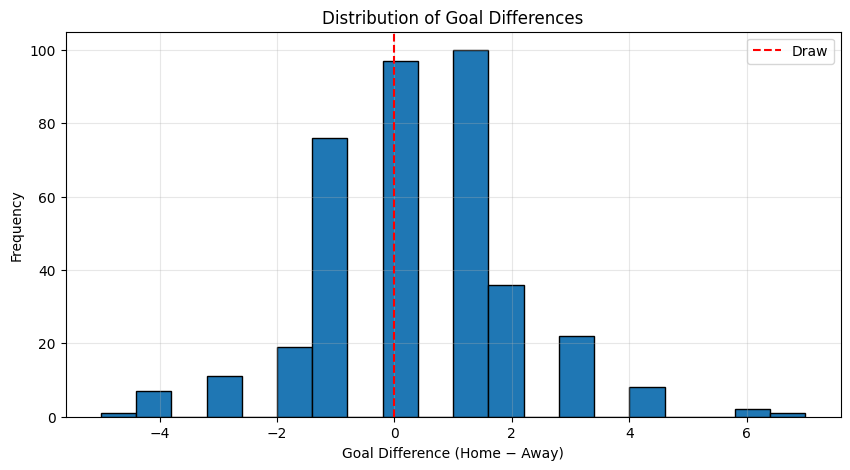

count    380.000000
mean       0.286842
std        1.662670
min       -5.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max        7.000000
Name: goal_diff, dtype: float64


In [14]:
plt.figure(figsize=(10, 5))
df['goal_diff'].hist(bins=20, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Draw')
plt.xlabel('Goal Difference (Home − Away)')
plt.ylabel('Frequency')
plt.title('Distribution of Goal Differences')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(df['goal_diff'].describe())

In [15]:
features_simple = ['HS', 'AS', 'HST', 'AST', 'HC', 'AC']

X_simple = df[features_simple].fillna(df[features_simple].mean())
y_simple = df['goal_diff']

print(f"Simple feature matrix shape: {X_simple.shape}")

Simple feature matrix shape: (380, 6)


In [18]:
from sklearn.model_selection import train_test_split

# First split: 70% train, 30% temp
X_train_simple, X_temp_simple, y_train_simple, y_temp_simple = train_test_split(
    X_simple,
    y_simple,
    test_size=0.30,
    random_state=42,
    shuffle=True
)

# Second split: 20% test, 10% validation
X_test_simple, X_val_simple, y_test_simple, y_val_simple = train_test_split(
    X_temp_simple,
    y_temp_simple,
    test_size=1/3,   # 10% of total
    random_state=42,
    shuffle=True
)

print(f"Train size: {len(X_train_simple)}")
print(f"Test size: {len(X_test_simple)}")
print(f"Validation size: {len(X_val_simple)}")

Train size: 266
Test size: 76
Validation size: 38


In [21]:
## 5. Baseline Model: Random Forespython
rf_baseline = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_baseline.fit(X_train_simple, y_train_simple)
preds_baseline = rf_baseline.predict(X_test_simple)

mae_baseline = mean_absolute_error(y_test_simple, preds_baseline)
mse_baseline = mean_squared_error(y_test_simple, preds_baseline)
rmse_baseline = np.sqrt(mse_baseline)
dir_acc_baseline = direction_accuracy(y_test_simple, preds_baseline)

print('Baseline Random Forest')
print(f"MAE:  {mae_baseline:.4f}")
print(f"MSE:  {mse_baseline:.4f}")
print(f"RMSE: {rmse_baseline:.4f}")
print(f"Direction Accuracy: {dir_acc_baseline:.2%}")

Baseline Random Forest
MAE:  0.9284
MSE:  1.5406
RMSE: 1.2412
Direction Accuracy: 51.32%


In [22]:
X_advanced, y_advanced = build_features_advanced(df, include_rolling=True)

print(f"Advanced feature matrix shape: {X_advanced.shape}")
print(f"Number of features: {X_advanced.shape[1]}")
print(f"Missing values: {X_advanced.isnull().sum().sum()}")
print('Feature names:')
print(list(X_advanced.columns))

Advanced feature matrix shape: (380, 18)
Number of features: 18
Missing values: 0
Feature names:
['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'home_goals_rolling', 'home_conceded_rolling', 'away_goals_rolling', 'away_conceded_rolling', 'home_shots_rolling', 'away_shots_rolling', 'home_sot_rolling', 'away_sot_rolling', 'home_corners_rolling', 'away_corners_rolling', 'home_points_rolling', 'away_points_rolling']


In [23]:
# Use the same random split strategy for advanced features
X_train_adv, X_temp_adv, y_train_adv, y_temp_adv = train_test_split(
X_advanced,
y_advanced,
test_size=0.30,
random_state=42,
shuffle=True
)


X_test_adv, X_val_adv, y_test_adv, y_val_adv = train_test_split(
X_temp_adv,
y_temp_adv,
test_size=1/3,
random_state=42,
shuffle=True
)


print(f"Train size: {len(X_train_adv)}")
print(f"Test size: {len(X_test_adv)}")
print(f"Validation size: {len(X_val_adv)}")

Train size: 266
Test size: 76
Validation size: 38


In [29]:
## 7. Optimized Model: Random Forest with Formpython
rf_optimized = RandomForestRegressor(
n_estimators=200,
max_depth=15,
min_samples_split=5,
min_samples_leaf=2,
random_state=42,
n_jobs=-1
)


rf_optimized.fit(X_train_adv, y_train_adv)
preds_optimized = rf_optimized.predict(X_test_adv)


mae_optimized = mean_absolute_error(y_test_adv, preds_optimized)
mse_optimized = mean_squared_error(y_test_adv, preds_optimized)
rmse_optimized = np.sqrt(mse_optimized)
dir_acc_optimized = direction_accuracy(y_test_adv, preds_optimized)


print('Optimized Random Forest')
print(f"MAE: {mae_optimized:.4f}")
print(f"MSE: {mse_optimized:.4f}")
print(f"RMSE: {rmse_optimized:.4f}")
print(f"Direction Accuracy: {dir_acc_optimized:.2%}")

Optimized Random Forest
MAE: 0.9111
MSE: 1.3014
RMSE: 1.1408
Direction Accuracy: 50.00%


In [31]:
mae_improvement = ((mae_baseline - mae_optimized) / mae_baseline) * 100
mse_improvement = ((mse_baseline - mse_optimized) / mse_baseline) * 100


def pct(x):
    return f"{x:+.2f}%"


print('=' * 70)
print('MODEL COMPARISON – RANDOM FOREST')
print('=' * 70)
print(f"MAE : {mae_baseline:.4f} → {mae_optimized:.4f} ({pct(mae_improvement)})")
print(f"MSE : {mse_baseline:.4f} → {mse_optimized:.4f} ({pct(mse_improvement)})")
print(f"DirA : {dir_acc_baseline:.2%} → {dir_acc_optimized:.2%}")
print('=' * 70)

MODEL COMPARISON – RANDOM FOREST
MAE : 0.9284 → 0.9111 (+1.87%)
MSE : 1.5406 → 1.3014 (+15.52%)
DirA : 51.32% → 50.00%


In [32]:
results_baseline_full = evaluate_model(y_test_simple, preds_baseline, 'Baseline Random Forest')
results_optimized_full = evaluate_model(y_test_adv, preds_optimized, 'Optimized Random Forest')


print_evaluation(results_baseline_full)
print_evaluation(results_optimized_full)


  Baseline Random Forest Evaluation
  Samples: 76

  Regression Metrics:
    MAE:  0.9284
    RMSE: 1.2412

  Direction Accuracy:
    Overall:   51.32%
    Home Wins: 83.87%
    Draws:     0.00%
    Away Wins: 61.90%


  Optimized Random Forest Evaluation
  Samples: 76

  Regression Metrics:
    MAE:  0.9111
    RMSE: 1.1408

  Direction Accuracy:
    Overall:   50.00%
    Home Wins: 90.32%
    Draws:     0.00%
    Away Wins: 47.62%



In [35]:
feature_importance = pd.DataFrame({
    'feature': list(X_advanced.columns),
    'importance': rf_optimized.feature_importances_
})

feature_importance = feature_importance.sort_values(
    'importance', ascending=False
).reset_index(drop=True)

print(feature_importance)


                  feature  importance
0                     AST    0.202644
1                     HST    0.165988
2    away_corners_rolling    0.055781
3     home_points_rolling    0.051967
4      home_goals_rolling    0.045664
5      home_shots_rolling    0.045161
6     away_points_rolling    0.045123
7        away_sot_rolling    0.043478
8      away_shots_rolling    0.043452
9                      AS    0.039804
10   home_corners_rolling    0.037994
11     away_goals_rolling    0.037641
12                     HC    0.037482
13       home_sot_rolling    0.035426
14                     HS    0.032854
15                     AC    0.030494
16  away_conceded_rolling    0.028842
17  home_conceded_rolling    0.020205


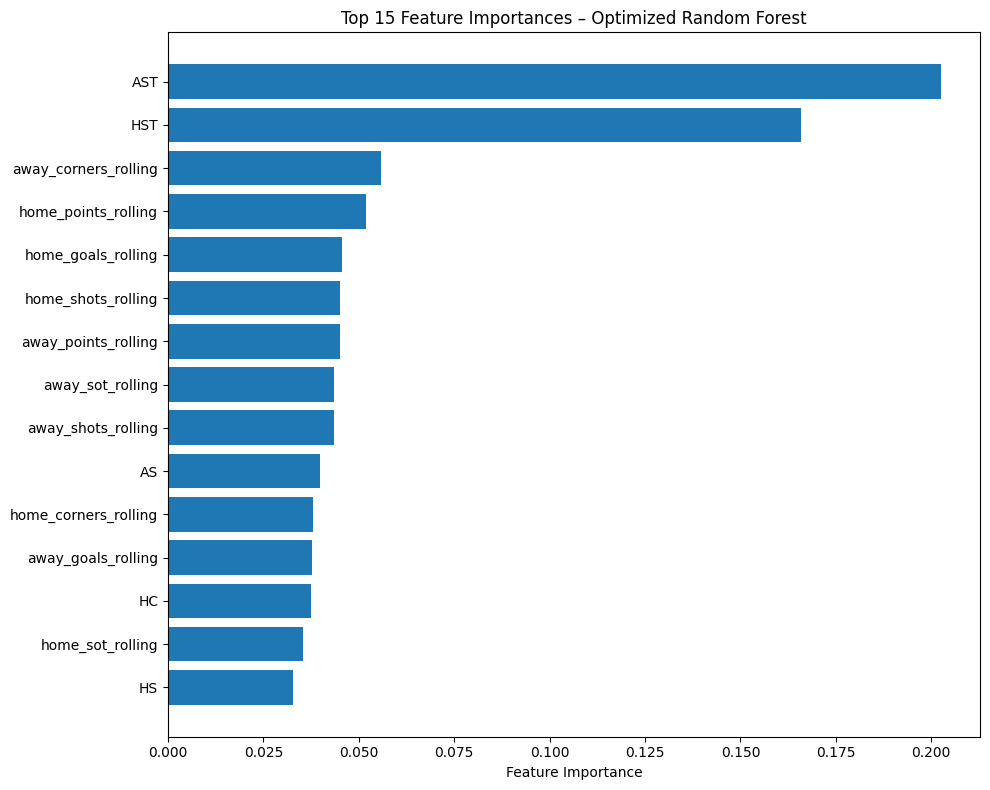

In [36]:
plt.figure(figsize=(10, 8))

top_features = feature_importance.head(15)

plt.barh(
    top_features['feature'].values,
    top_features['importance'].values
)

plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances – Optimized Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [37]:
comparison_df = pd.DataFrame({
'Actual': y_test_adv.values[:15],
'Predicted': preds_optimized[:15],
'Absolute_Error': np.abs(y_test_adv.values[:15] - preds_optimized[:15]),
'Correct_Direction': (np.sign(y_test_adv.values[:15]) == np.sign(preds_optimized[:15]))
})


comparison_df.round(2)

,Actual,Predicted,Absolute_Error,Correct_Direction
0,0,-0.20,0.20,False
1,0,-0.19,0.19,False
2,-1,1.77,2.77,False
3,-1,-1.21,0.21,True
4,-1,0.04,1.04,False
5,0,1.90,1.90,False
6,1,-0.78,1.78,False
7,-1,0.19,1.19,False
8,0,0.56,0.56,False
9,0,-0.03,0.03,False


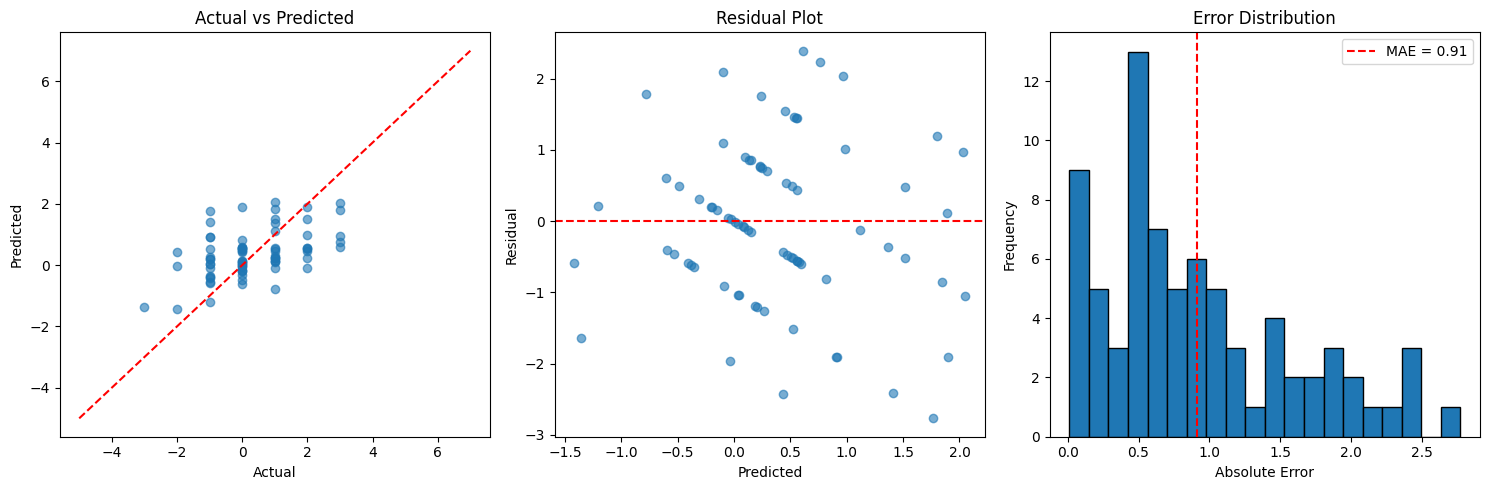

In [38]:
residuals = y_test_adv.values - preds_optimized


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.scatter(y_test_adv, preds_optimized, alpha=0.6)
plt.plot([-5, 7], [-5, 7], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


plt.subplot(1, 3, 2)
plt.scatter(preds_optimized, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot')


plt.subplot(1, 3, 3)
plt.hist(np.abs(residuals), bins=20, edgecolor='black')
plt.axvline(mae_optimized, color='r', linestyle='--', label=f'MAE = {mae_optimized:.2f}')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
results_df = pd.DataFrame({
'actual': y_test_adv.values,
'predicted': preds_optimized,
'error': np.abs(y_test_adv.values - preds_optimized),
'correct_direction': (np.sign(y_test_adv.values) == np.sign(preds_optimized))
})


results_df.to_csv('c:/Users/Yasin/Desktop/laliga_ml_sandbox/model_predictions.csv', index=False)


metrics_summary = pd.DataFrame({
'Model': ['Baseline RF', 'Optimized RF'],
'MAE': [mae_baseline, mae_optimized],
'MSE': [mse_baseline, mse_optimized],
'RMSE': [rmse_baseline, rmse_optimized],
'Direction_Accuracy_%': [dir_acc_baseline * 100, dir_acc_optimized * 100]
})


metrics_summary.to_csv('c:/Users/Yasin/Desktop/laliga_ml_sandbox/model_metrics.csv', index=False)


print('✅ Predictions and metrics saved.')

✅ Predictions and metrics saved.
